##problem 1
QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

In [ ]:

import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")


df.head(1)

In [ ]:

df.info()




here is charges column we have to predict and there is no null values in the datasets and age,bmi,children ,charges is number and sex,smoker and region is string

In [ ]:


df.describe()




In [ ]:
!pip install plotly





In [ ]:

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline





In [ ]:
#imporove the default style and fontsizes for our charts

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["figure.facecolor"]= "#00000000"




In [ ]:

#histogram grpah of age

fig = px.histogram(df,x="age",marginal = "box",nbins = 47,title="description of age")
fig.update_layout(bargap = 0.1)
fig.show()




In [ ]:

#scatter grpah of age and charges

fig = px.scatter(df,x="age",y="charges",color = "smoker",opacity = 0.8,hover_data =["sex"],title = "age vs charges")
fig.update_traces(marker_size = 5)
fig.show()







In [ ]:

#scatter graph of bmi and charges
fig = px.scatter(df,x="bmi",y="charges",color = "smoker",opacity = 0.8,hover_data =["sex"],title = "bmi vs charges")
fig.update_traces(marker_size = 5)
fig.show()





In [ ]:

#correlation
print(f"the correlation of charges and age is {df.charges.corr(df.age)}")
print(f"the correlation of charges and bmi is {df.charges.corr(df.bmi)}")
#compute caterogical coloumn to numerical coloumn
smoker_values = {"no":0,"yes":1}
df1 =df.smoker.map(smoker_values)
print(f"the correlation of charges and smoker is {df.charges.corr(df1)} ")




the correlation of charges and age is 0.2990081933306476
the correlation of charges and bmi is 0.19834096883362895
the correlation of charges and smoker is 0.787251430498478 


In [ ]:

df.drop("sex",axis = 1,inplace=True)
df.drop("smoker",axis = 1,inplace=True)
df["smoker"]=df1

df.head(1)






,age,bmi,children,region,charges,smoker
0,19,27.9,0,southwest,16884.924,1


Text(0.5, 1.0, 'data correlation matrix')

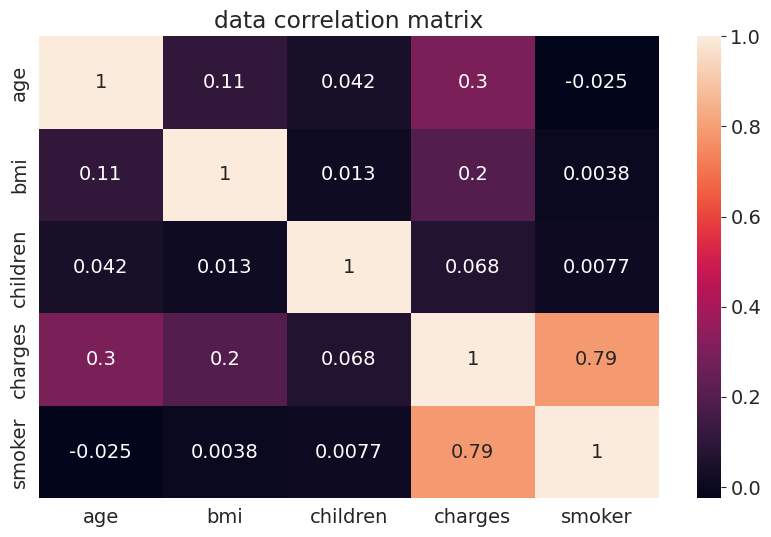

In [ ]:
#df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("data correlation matrix")




##linear regresion using single features
we know that the "smoker" and "age" have strong corrilation then lets find a way to esstimate the charges using the age and no smokers data


<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

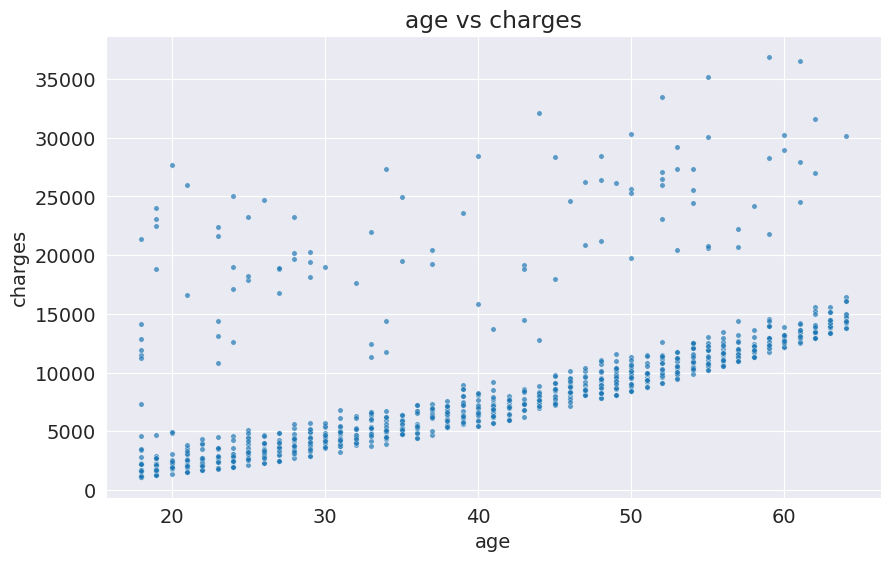

In [ ]:
#no smoker data
no_smoker_df = df[df["smoker"]==0]
#ploting the data
plt.title("age vs charges")
sns.scatterplot(no_smoker_df,x="age",y="charges",alpha=0.7,s=15)





here, we can se the points form the line so,we fit the line using the formula          y=wx+b

where,
       y(output)
       w(slope)
       b(intercept)
In the above axis the x is age and y is charges
so, charges= w*age+b


In [ ]:
def estimate_charges(df,w,b):
  return w*df+b

estimate_charges(26,51,100)




1426

the rmse of the model is 8427.26918594047


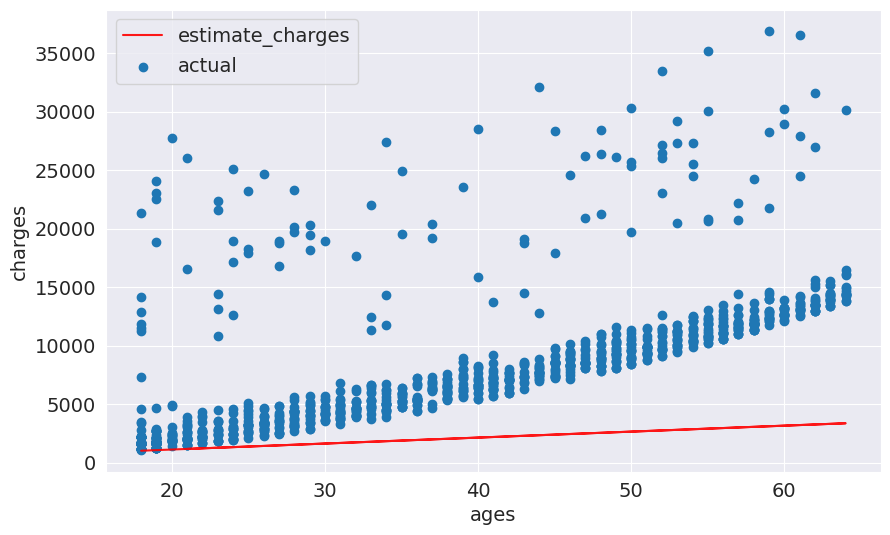

In [ ]:


#calculate root mean square error
import numpy as np
def rmse(targets,predictions):
  return  np.sqrt(np.mean(np.square(targets-predictions)))

def try_parameters(w,b):
  ages = no_smoker_df.age
  target_charges = no_smoker_df.charges
  estimate_charge =  estimate_charges(ages,w,b)
  root_mean_square_error=rmse(target_charges,estimate_charge)
  print(f"the rmse of the model is {root_mean_square_error}")
  plt.plot(ages,estimate_charge,'r',alpha = 0.9)
  plt.scatter(ages,target_charges)
  plt.xlabel("ages")
  plt.ylabel("charges")
  plt.legend(["estimate_charges","actual"])


try_parameters(51,100)




In [ ]:



!pip install scikit-learn



##linear regresion using scikit learn

In [ ]:


#using linear regresion class from sciket learn

from sklearn.linear_model import LinearRegression

#create a new model object

model = LinearRegression()


#input_data = df.drop(["charges","region"],axis = 1)
input_data = no_smoker_df[['age']]
output_data = no_smoker_df.charges

output_data.head(1)

model.fit(input_data,output_data)


LinearRegression()

the model have error 4662.505766636395
the rmse of the model is 4662.505766636395


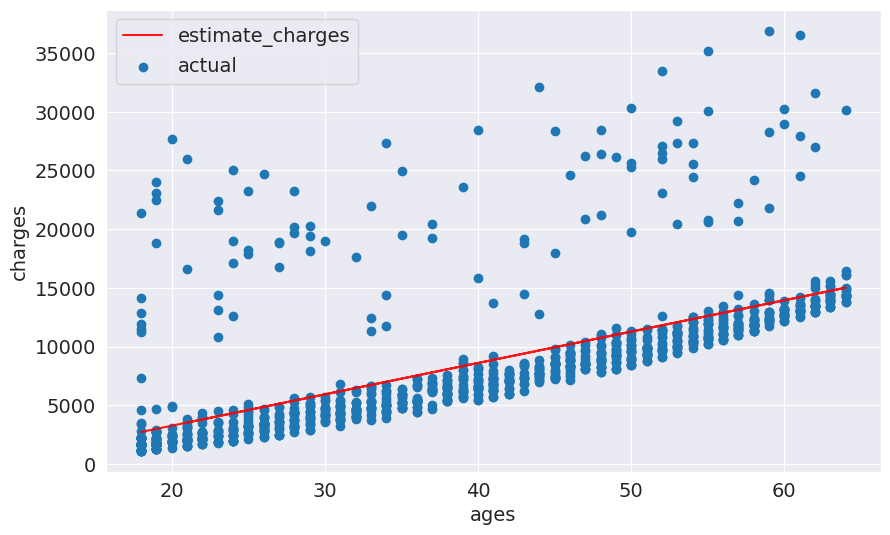

In [ ]:

#model.predict(np.array([[19,27.9,0,1]]))
#print(f""" {input_data.head(1)} \t {output_data.head(1)}""")

estimate = model.predict(input_data)

print(f"the model have error {rmse(output_data,estimate)}")

try_parameters(model.coef_,model.intercept_)




##problem 2
The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset
As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

In [ ]:

import pandas as pd

df = pd.read_csv("/content/sample_data/weatherAUS.csv")
#df.head(1)
#df.info()
df.drop("Date",axis=1,inplace=True)
df.dropna(subset=["RainToday","RainTomorrow"],inplace=True)
df.head(1)





FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/weatherAUS.csv'

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"]=11
matplotlib.rcParams["figure.figsize"]=(10,9)
matplotlib.rcParams["figure.facecolor"]="#00000000"


px.histogram(df,x="Location",title = "location vs rainy days",color="RainToday")




In [ ]:


px.histogram(df,x="Temp3pm",color = "RainToday",title = "Temp3pmvsRainToday")





In [ ]:

px.histogram(df,x="RainToday",color = "RainTomorrow",title = "RainTodayvsRainTomorrow")





In [ ]:


px.scatter(df,x="MinTemp",y="MaxTemp",color="RainToday",title = "MinTempvsMaxTemp")




In [ ]:

from sklearn.model_selection import train_test_split

plt.figure(figsize = (12,9))
sns.heatmap(df.corr(numeric_only=True),annot =True)
plt.show()




In [ ]:

numeric_coloumns = df.select_dtypes(include = np.number).columns.to_list()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="mean")
"""
removing the null value using the imputer
df[numeric_coloumns].isna().sum()
"""
imputer.fit(df[numeric_coloumns])
df[numeric_coloumns] = imputer.transform(df[numeric_coloumns])
#df[numeric_coloumns].isna().sum()






In [ ]:


#scalling the data using the min max scaller
from sklearn.preprocessing import MinMaxScaler
scaler_data = MinMaxScaler()
scaler_data.fit(df[numeric_coloumns])
#df[numeric_coloumns]





In [ ]:

categrical_coloumn = df.select_dtypes(include="object").columns.tolist()
categrical_coloumn
"""
using the sklearn one hot enoder to encode the catogarical data
"""
from sklearn.preprocessing import OneHotEncoder
encode_data = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=5)
encode_data.fit(df[categrical_coloumn])
encode_columns = list(encode_data.get_feature_names_out(categrical_coloumn))
df[encode_columns] = encode_data.transform(df[categrical_coloumn])






In [ ]:
df[categrical_coloumn]





In [ ]:

#asuming the target variable is raintommorow
x=df.drop("RainTomorrow",axis = 1)
y = df["RainTomorrow"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =41)

print(f"train x shape {x_train.shape} train y shape {y_train.shape}")
print(f"test x shape {x_test.shape} train y shape {y_test.shape}")







In [ ]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver ="liblinear",max_iter=1000,tol =0.00001)

model.fit(x_train[encode_columns + numeric_coloumns],y_train)





In [ ]:

#testing the model

test_outpts = model.predict(x_test[encode_columns+numeric_coloumns])

#using the sklearn accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_outpts)







##problem 3
The Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations. Here's a small sample from the dataset
As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow
##using decsion tree machine

In [ ]:

import  pandas as pd
import numpy as np
df = pd.read_csv("/content/sample_data/weatherAUS.csv")
df.drop("Date",axis =1,inplace =True)
df.dropna(subset =["RainToday","RainTomorrow"],inplace=True)
numeric_column = df.select_dtypes(include = np.number).columns.to_list()
categorical_column = df.select_dtypes(include = "object").columns.to_list()






In [ ]:

from sklearn.impute import SimpleImputer
"""
remove the null value using sckit imputer
"""
imputer = SimpleImputer()
imputer.fit(df[numeric_column])
df[numeric_column] = imputer.transform(df[numeric_column])

from sklearn.preprocessing import MinMaxScaler
"""
scaling the  data using sckit learn min max scaler
"""
scaler_data = MinMaxScaler()
scaler_data.fit(df[numeric_column])

from sklearn.preprocessing import OneHotEncoder
"""
using the sklearn one hot encoder to encode the data
"""
encode_data = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=5)
encode_data.fit(df[categorical_column])
encode_columns = list(encode_data.get_feature_names_out(categorical_column))
df[encode_columns] = encode_data.transform(df[categorical_column])




In [ ]:


x = df.drop("RainTomorrow",axis =1)
y = df["RainTomorrow"]
#splitting the data for training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state =41)




In [ ]:
#using the decsion tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=41)
model.fit(x_train[numeric_column+encode_columns],y_train)





NameError: name 'x_train' is not defined

In [ ]:
#using the sklearn acuracy
from sklearn.metrics import accuracy_score

test_pred = model.predict(x_test[numeric_column+encode_columns])
print(f"the accuracy of the model is {accuracy_score(test_pred,y_test)}")






In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df.head(1)





,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


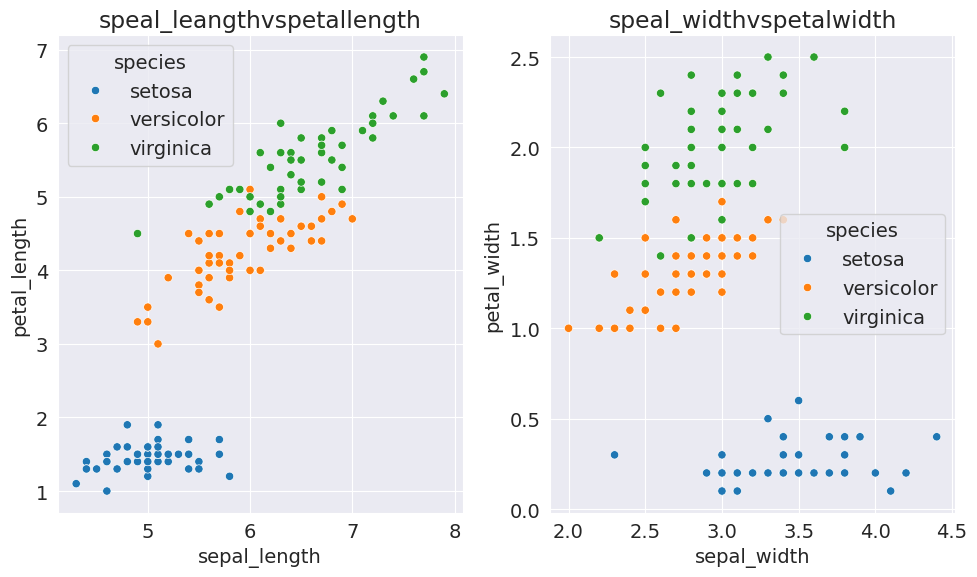

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(df,x="sepal_length",y="petal_length",hue ="species")
plt.title("speal_leangthvspetallength")
plt.subplot(1,2,2)
sns.scatterplot(df,x="sepal_width",y="petal_width",hue ="species")
plt.title("speal_widthvspetalwidth")

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




In [ ]:

from sklearn.cluster import KMeans

model = KMeans(n_clusters=2,random_state=41)
x = df.drop("species",axis =1)
model.fit(x)





KMeans(n_clusters=2, random_state=41)

In [ ]:

x.head(1)



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


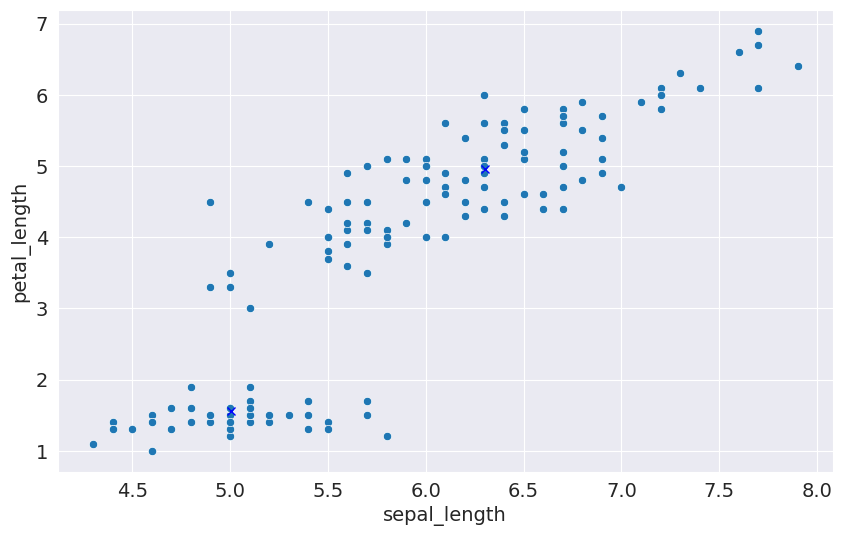

In [ ]:

#model.predict(x)

sns.scatterplot(data=x,x="sepal_length",y="petal_length")
center_x,center_y=model.cluster_centers_[:,0],model.cluster_centers_[:,2]
plt.plot(center_x,center_y,"xb")





In [ ]:



model.inertia_






152.36870647733915

In [ ]:

model.cluster_centers_

#center_y









NameError: name 'model' is not defined